### Simple Linear regression predection and finding error loss
### EQN: y=mx+c

### About Project:
This project in focused on compareing the results of a simple linear regression model by tredetional formula and libreary
### About Data:
This data contains Years of experience and Salary of an organiziation

#### 1.Importing the requred

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.Importing the table

In [4]:
exp_sel_tab=pd.read_csv("expirence and seleary.csv")

In [4]:
print(exp_sel_tab.head())
print(exp_sel_tab.describe())
print(exp_sel_tab.info())
#every thing is good

   year_of_expirence  seleary_in_1000k
0                  2                15
1                  3                28
2                  5                42
3                 13                64
4                  8                50
       year_of_expirence  seleary_in_1000k
count           9.000000          9.000000
mean            7.555556         45.444444
std             5.198825         25.559299
min             1.000000          8.000000
25%             3.000000         28.000000
50%             8.000000         50.000000
75%            11.000000         58.000000
max            16.000000         90.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   year_of_expirence  9 non-null      int64
 1   seleary_in_1000k   9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes
None


#### 3.Visualizing data

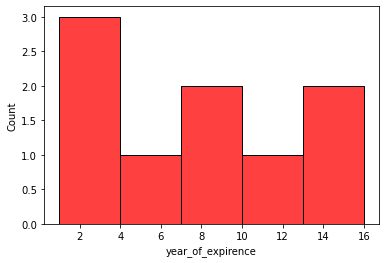

In [5]:
sns.histplot(exp_sel_tab["year_of_expirence"],color="r")
plt.show()

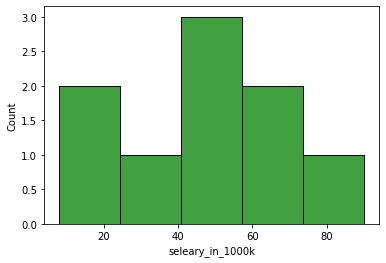

In [6]:
sns.histplot(exp_sel_tab["seleary_in_1000k"],color="g")
plt.show()

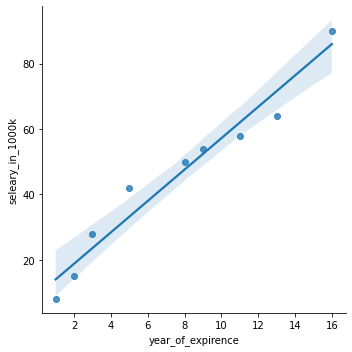

In [7]:
sns.lmplot(data=exp_sel_tab,x="year_of_expirence",y="seleary_in_1000k")
plt.show()

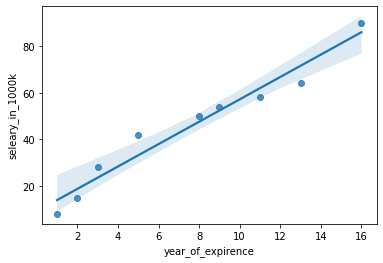

In [8]:
sns.regplot(data=exp_sel_tab,x=("year_of_expirence"),y=("seleary_in_1000k"))
plt.show()

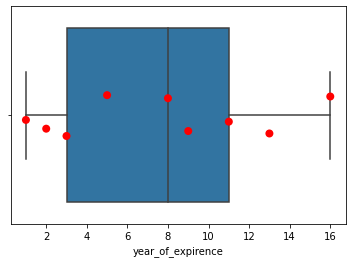

In [9]:
sns.boxplot(data=exp_sel_tab,x=("year_of_expirence"))
sns.stripplot(data=exp_sel_tab,x=("year_of_expirence"),color="R",size=8)#why whisker line is not shown
plt.show()

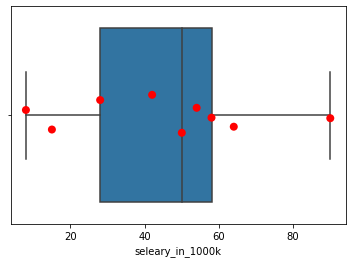

In [10]:
sns.boxplot(data=exp_sel_tab,x=("seleary_in_1000k"))
sns.stripplot(data=exp_sel_tab,x=("seleary_in_1000k"),color="R",size=8)#why whisker line is not shown
plt.show()

### Manual linear regression

#### 4.Finding slope [Change in Y / change in X]

In [11]:
mean_exp=(exp_sel_tab.loc[:,["year_of_expirence"]]).mean()
print(mean_exp)
mean_selery=(exp_sel_tab.loc[:,["seleary_in_1000k"]]).mean()
print(mean_selery)

year_of_expirence    7.555556
dtype: float64
seleary_in_1000k    45.444444
dtype: float64


In [12]:
exp=(exp_sel_tab.loc[:,["year_of_expirence"]])
selery=(exp_sel_tab.loc[:,["seleary_in_1000k"]])
print(exp)
print(selery)

   year_of_expirence
0                  2
1                  3
2                  5
3                 13
4                  8
5                 16
6                 11
7                  1
8                  9
   seleary_in_1000k
0                15
1                28
2                42
3                64
4                50
5                90
6                58
7                 8
8                54


In [13]:
num1=(np.array(mean_exp-exp))*(np.array(mean_selery-selery))
dem1=(np.array(mean_exp-exp)**2)
num=num1.sum()
dem=dem1.sum()

In [14]:
The_slope_of_linear_reg=(num/dem)
print("The_slope_of_linear_reg=",The_slope_of_linear_reg)

The_slope_of_linear_reg= 4.799588900308325


#### 5.finding y-intercept [c]
c=ybar-(m*xbar)

In [15]:
y_intercept=((np.array(mean_selery))-((np.array(mean_exp))*The_slope_of_linear_reg))
print(y_intercept)

[9.18088386]


#### 6.finding linear reg number by having expirence as indipendent [y]
y=mx+c

In [16]:
m=The_slope_of_linear_reg
c=y_intercept
x=np.array(exp)

In [17]:
y=(m*x)+c

In [18]:
print(y)

[[18.78006166]
 [23.57965057]
 [33.17882837]
 [71.57553957]
 [47.57759507]
 [85.97430627]
 [61.97636177]
 [13.98047276]
 [52.37718397]]


#### 7.finding the squared error(E)

In [19]:
E1=(y-(np.array(selery)))**2
print(E1)

[[14.28886619]
 [19.53948913]
 [77.813069  ]
 [57.38879975]
 [ 5.86804566]
 [16.20621001]
 [15.81145291]
 [35.76605449]
 [ 2.63353188]]


In [20]:
E=sum(E1)
print("sum_of_squared_error=",E)
print("mean_squared_error=",E/len(E1))

sum_of_squared_error= [245.31551901]
mean_squared_error= [27.25727989]


#### 8.Error mean (em)

In [21]:
print(np.shape(y))

(9, 1)


In [22]:
em=(np.sqrt(E))/(len(E1))
print(em)

[1.7402835]


#### 9.viewing data with predection

In [23]:
predected=pd.DataFrame(y)
predected.columns=["predected_slery"]

In [24]:
print(exp)
print(selery)
#print(y)
print(predected)

   year_of_expirence
0                  2
1                  3
2                  5
3                 13
4                  8
5                 16
6                 11
7                  1
8                  9
   seleary_in_1000k
0                15
1                28
2                42
3                64
4                50
5                90
6                58
7                 8
8                54
   predected_slery
0        18.780062
1        23.579651
2        33.178828
3        71.575540
4        47.577595
5        85.974306
6        61.976362
7        13.980473
8        52.377184


In [25]:
ps=pd.DataFrame()
ps["year_of_expirence"]=exp.year_of_expirence
ps["seleary_in_1000k"]=selery.seleary_in_1000k
ps["predected_slery"]=predected.predected_slery
print(ps)

   year_of_expirence  seleary_in_1000k  predected_slery
0                  2                15        18.780062
1                  3                28        23.579651
2                  5                42        33.178828
3                 13                64        71.575540
4                  8                50        47.577595
5                 16                90        85.974306
6                 11                58        61.976362
7                  1                 8        13.980473
8                  9                54        52.377184


#### 10.New predection by input

In [26]:
exp1=float(input("Enter your expirence "))
sal=((m*exp1)+c)
print("Your selery would be",sal,"K with the mean error of",em,"and mean squared error of",E/len(E1))

Enter your expirence 


ValueError: could not convert string to float: ''

#### 11.Linear predection line difference

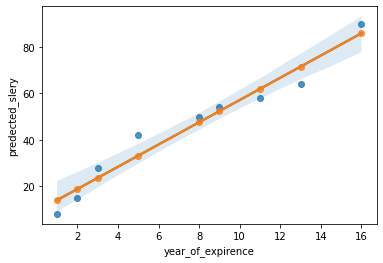

In [27]:
sns.regplot(data=ps,x="year_of_expirence",y="seleary_in_1000k")
sns.regplot(data=ps,x="year_of_expirence",y="predected_slery")
plt.show()

### Linear regression Using libreary

In [28]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=2)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
skfold=StratifiedKFold

#### 1.Selecting data

In [6]:
df=exp_sel_tab
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   year_of_expirence  seleary_in_1000k
0                  2                15
1                  3                28
2                  5                42
3                 13                64
4                  8                50
-----------------------------------------------------------------------------------------------
Columns names
Index(['year_of_expirence', 'seleary_in_1000k'], dtype='object')


#### 2.Describing data

In [7]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data Description
       year_of_expirence  seleary_in_1000k
count           9.000000          9.000000
mean            7.555556         45.444444
std             5.198825         25.559299
min             1.000000          8.000000
25%             3.000000         28.000000
50%             8.000000         50.000000
75%            11.000000         58.000000
max            16.000000         90.000000
-----------------------------------------------------------------------------------------------
Number of rows and columns
(9, 2)
-----------------------------------------------------------------------------------------------
data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   year_of_expirence  9 non-null      int64
 1   seleary_in_1000k   9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes
None
---------------------

#### 3.forming the data to x as indipendent and y as dipendent

In [34]:
x=df.drop(["seleary_in_1000k"],axis=1)
y=df.drop(["year_of_expirence"],axis=1)

#### 4.Training the data with test size as 20%

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [36]:
lin_regressor=LinearRegression()
lin_regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
predection=lin_regressor.predict(x_test)
print(predection)

[[ 9.71841155]
 [29.92779783]
 [19.82310469]
 [45.08483755]]


In [38]:
print(y_test)

   seleary_in_1000k
7                 8
2                42
1                28
4                50


#### 5.Viewing the test score

In [39]:
print("Train score",lin_regressor.score(x_train,y_train))
print("Test score",lin_regressor.score(x_test,y_test))

Train score 0.9723265986345927
Test score 0.7640635411233099
